In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyreadr

data = pyreadr.read_r('M2/Data.RData') # also works for Rds

In [3]:
print(data.keys()) # let's check what objects we got

learn = data['learn']
test = data['test']

odict_keys(['.Random.seed', 'learn', 'test'])


In [4]:
import random
random.seed(1450)

# Analyse Exploratoire

In [5]:
print(len(learn))
learn.head(3)

5000


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,-1.315104,-0.240538,B,1.755215,0.795464,1,b,-0.346082,1.082076,A,...,2.369179,b,1.443978,1.824798,0.829612,0.056779,1,1.461547,A,2.406301
1,-0.669916,-0.776774,B,0.910871,0.967218,1,b,0.204782,0.488878,A,...,0.629484,b,1.856766,0.885839,0.874151,0.292776,1,1.835593,A,1.806157
2,-0.669916,-0.683651,A,0.849125,0.583180,-1,b,-0.165228,1.139386,A,...,0.447210,c,0.193961,1.277355,-0.427721,0.668098,1,0.261418,A,-0.176492


In [6]:
print(learn.dtypes)
learn.shape
# print(learn.describe().transpose())

X1      float64
X2      float64
X3     category
X4      float64
X5      float64
X6       object
X7     category
X8      float64
X9      float64
X10    category
X11     float64
X12     float64
X13    category
X14     float64
X15     float64
X16     float64
X17     float64
X18      object
X19     float64
X20    category
Y       float64
dtype: object


(5000, 21)

In [7]:
#Categorails values 

categorials_var = learn.select_dtypes(include='category')
print(categorials_var.head(2))

  X3 X7 X10 X13 X20
0  B  b   A   b   A
1  B  b   A   b   A


## Matrice de corrélation (Variables quantitatives)

In [8]:
learnQuanti = learn._get_numeric_data()

learnQuanti.head(2)

,X1,X2,X4,X5,X8,X9,X11,X12,X14,X15,X16,X17,X19,Y
0,-1.315104,-0.240538,1.755215,0.795464,-0.346082,1.082076,0.445504,2.369179,1.443978,1.824798,0.829612,0.056779,1.461547,2.406301
1,-0.669916,-0.776774,0.910871,0.967218,0.204782,0.488878,0.143632,0.629484,1.856766,0.885839,0.874151,0.292776,1.835593,1.806157


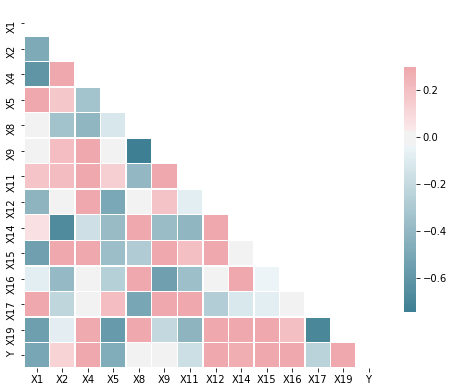

In [9]:
# Compute the correlation matrix
corr = learnQuanti.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

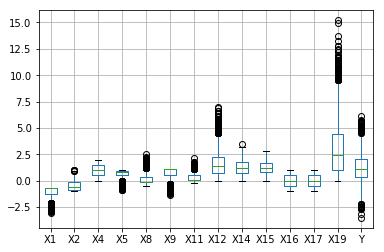

In [10]:
learnQuanti.boxplot()

In [12]:
learn.shape

(5000, 21)

### Missing Values

In [13]:
#Missing values 
print(learn.shape)
print(learn.isnull().sum())
learn2 = learn
learn2['missing_values'] = learn2.apply(lambda x: x.count(), axis=1)

#Aucune valeur manquante dans la variable à prédire Y

print(learn2.head(3))

if len(learn2[learn2['missing_values']!=22])/learn2.shape[0]>=0.05:
    print('Plus de 5% des lignes ont au moins une données manquantes :',round(len(learn2[learn2['missing_values']!=22])*100/learn2.shape[0],0),'%','impossible de supprimer les données manquantes','\n')
else:
    print('Moins de 5% des lignes ont au moins une données manquantes :',round(len(learn2[learn2['missing_values']!=22])*100/learn2.shape[0],0),'%','possibilité de supprimer les données manquantes','\n')

(5000, 21)
X1     43
X2     51
X3     58
X4     57
X5     59
X6     54
X7     53
X8     52
X9     53
X10    55
X11    45
X12    47
X13    45
X14    47
X15    55
X16    56
X17    54
X18    51
X19    54
X20    56
Y       0
dtype: int64
         X1        X2 X3        X4        X5  X6 X7        X8        X9 X10  \
0 -1.315104 -0.240538  B  1.755215  0.795464   1  b -0.346082  1.082076   A   
1 -0.669916 -0.776774  B  0.910871  0.967218   1  b  0.204782  0.488878   A   
2 -0.669916 -0.683651  A  0.849125  0.583180  -1  b -0.165228  1.139386   A   

       ...        X13       X14       X15       X16       X17  X18       X19  \
0      ...          b  1.443978  1.824798  0.829612  0.056779    1  1.461547   
1      ...          b  1.856766  0.885839  0.874151  0.292776    1  1.835593   
2      ...          c  0.193961  1.277355 -0.427721  0.668098    1  0.261418   

  X20         Y missing_values  
0   A  2.406301             21  
1   A  1.806157             21  
2   A -0.176492             2

In [14]:
learn2 = learn2.drop('missing_values',1)
learn = learn.drop('missing_values',1)
#learn2 = learn2.drop('Y',1)
learn2.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,-1.315104,-0.240538,B,1.755215,0.795464,1,b,-0.346082,1.082076,A,...,2.369179,b,1.443978,1.824798,0.829612,0.056779,1,1.461547,A,2.406301
1,-0.669916,-0.776774,B,0.910871,0.967218,1,b,0.204782,0.488878,A,...,0.629484,b,1.856766,0.885839,0.874151,0.292776,1,1.835593,A,1.806157


### Imputation Multiple

On remplace chaque valeur manquante par M(>1) valeur tirées dans une distribution approprie
On considère que pour M = 5 on à de bon résultat
Maxit = on relance 10 fois l'imputation multiple 
On utilise la méthode "Predictive mean matching" : pmm / convient à tout types de variables (num ou char)

In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ModuleNotFoundError: No module named 'sklearn.experimental'

In [15]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(learn)
#https://scikit-learn.org/stable/modules/impute.html

NameError: name 'IterativeImputer' is not defined

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imp.fit(learn)
CompletedData_SIM = pd.DataFrame(imp.transform(learn))

CompletedData_SIM.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:318: RuntimeWarning: invalid value encountered in not_equal
  return X != X
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:318: RuntimeWarning: invalid value encountered in not_equal
  return X != X


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.3151,-0.240538,B,1.75521,0.795464,1,b,-0.346082,1.08208,A,...,2.36918,b,1.44398,1.8248,0.829612,0.0567793,1,1.46155,A,2.4063
1,-0.669916,-0.776774,B,0.910871,0.967218,1,b,0.204782,0.488878,A,...,0.629484,b,1.85677,0.885839,0.874151,0.292776,1,1.83559,A,1.80616


In [19]:
print(CompletedData_SIM.shape,learn.shape)

(5000, 21) (5000, 21)


In [20]:
#rename columns 
learn_list_of_names = list(learn)
CompletedData_SIM.columns = learn_list_of_names
CompletedData_SIM.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,-1.3151,-0.240538,B,1.75521,0.795464,1,b,-0.346082,1.08208,A,...,2.36918,b,1.44398,1.8248,0.829612,0.0567793,1,1.46155,A,2.4063
1,-0.669916,-0.776774,B,0.910871,0.967218,1,b,0.204782,0.488878,A,...,0.629484,b,1.85677,0.885839,0.874151,0.292776,1,1.83559,A,1.80616
2,-0.669916,-0.683651,A,0.849125,0.58318,-1,b,-0.165228,1.13939,A,...,0.44721,c,0.193961,1.27736,-0.427721,0.668098,1,0.261418,A,-0.176492


In [21]:
categorials_var_list = categorials_var.columns.tolist()
categorials_var_list

['X3', 'X7', 'X10', 'X13', 'X20']

In [22]:
quanti_var_list = learnQuanti.columns.tolist()
print(quanti_var_list)

CompletedData_SIM_quanti = CompletedData_SIM[quanti_var_list]
CompletedData_SIM_quanti.head(2)

['X1', 'X2', 'X4', 'X5', 'X8', 'X9', 'X11', 'X12', 'X14', 'X15', 'X16', 'X17', 'X19', 'Y']


,X1,X2,X4,X5,X8,X9,X11,X12,X14,X15,X16,X17,X19,Y
0,-1.3151,-0.240538,1.75521,0.795464,-0.346082,1.08208,0.445504,2.36918,1.44398,1.8248,0.829612,0.0567793,1.46155,2.4063
1,-0.669916,-0.776774,0.910871,0.967218,0.204782,0.488878,0.143632,0.629484,1.85677,0.885839,0.874151,0.292776,1.83559,1.80616


In [23]:
#One Hot Encoding Approach

#To avoid the interpretation of numeircal by algorithms. 
#the stratégy is to convert each category value into a new column and assign a 1/0 value. 
#This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set

from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb_style = LabelBinarizer()
lb_make = LabelEncoder()

#On retire les variable catégorielles de la base de données que l'on va concatener avec les variables catégorielles labélisées 




LB_df_int = pd.DataFrame()
for i in categorials_var_list:  
    if len(CompletedData_SIM[i].value_counts())==2:
        lb_results = lb_make.fit_transform(CompletedData_SIM[i].astype('str')) 
        data_lb = pd.DataFrame(lb_results, columns=[i])
        #print(data_lb.head())
        LB_df_int = pd.concat([LB_df_int, data_lb], axis=1)
        
    else: 
        lb_results = lb_style.fit_transform(CompletedData_SIM[i].astype('str'))
        data_lb = pd.DataFrame(lb_results, columns=lb_style.classes_)
        data_lb = data_lb.add_prefix(i+'_')
        #print(data_lb.head())
        LB_df_int = pd.concat([LB_df_int, data_lb], axis=1)
        
        
LB_df = pd.concat([LB_df_int, CompletedData_SIM_quanti], axis=1)
LB_df.head()    

,X3,X7_a,X7_b,X7_d,X7_e,X10,X13_a,X13_b,X13_c,X13_f,...,X8,X9,X11,X12,X14,X15,X16,X17,X19,Y
0,1,0,1,0,0,0,0,1,0,0,...,-0.346082,1.08208,0.445504,2.36918,1.44398,1.8248,0.829612,0.0567793,1.46155,2.4063
1,1,0,1,0,0,0,0,1,0,0,...,0.204782,0.488878,0.143632,0.629484,1.85677,0.885839,0.874151,0.292776,1.83559,1.80616
2,0,0,1,0,0,0,0,0,1,0,...,-0.165228,1.13939,0.945467,0.44721,0.193961,1.27736,-0.427721,0.668098,0.261418,-0.176492
3,0,0,1,0,0,0,0,1,0,0,...,-0.162357,0.941513,0.0425923,2.11372,0.676909,1.80037,0.660895,-0.308475,3.74596,2.59661
4,1,0,1,0,0,0,0,0,1,0,...,-0.0681436,0.212918,0.298849,0.333105,0.693852,0.550935,0.283491,0.243466,1.53669,1.3831


# Modélisation

Découpage de la base en apprntissage (80%) et validation (20%)

In [24]:
#features 
X = LB_df.as_matrix(LB_df.columns[:-1])


#ariable to be explained
Y = LB_df.as_matrix([LB_df.columns[-1]])
Y = Y.flatten()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

### Regression linéraire

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
RegLin = LinearRegression()

RegLin.fit(X=X_train,y=Y_train)

y_pred = RegLin.predict(X_test)

metrics.mean_squared_error(Y_test, y_pred)

0.5678455928153358

In [52]:
print(RegLin.intercept_)
print(RegLin.coef_)

RMSE=np.sqrt(((Y_test-y_pred)**2).sum()/len(Y_test))
print(RMSE)

-1825666242917.2427
[ 3.08676261e-02 -1.12439999e+12 -1.12439999e+12 -1.12439999e+12
 -1.12439999e+12 -6.33949766e-02  2.95006623e+12  2.95006623e+12
  2.95006623e+12  2.95006623e+12 -2.90907868e-02  2.56961844e-01
  1.06368292e-01  1.21443467e+00 -1.82463086e-01 -1.71086947e-01
  1.33447729e-02 -4.20499810e-01  1.34164234e-01 -1.49217836e-02
  9.83929155e-02  8.02270167e-01 -3.84483349e-01  3.14891724e-02]
0.7535553017631392
